In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import torch
import torch.optim as optim
import torchvision.datasets as dataset
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

In [7]:
#### Classifying point up  and down of line ####


# Random points of {0,1}x{0,1}
number_of_points=1300
input_dimension=2
output_dimension=1

# Generate and classify points that are in (1) or out (-1) of the circle
x=np.random.rand(number_of_points,input_dimension)
y=np.array([1 if i[0]<i[1] else -1 for i in x])
#y=np.array([1 if (i[0]-0.5)**2+(i[1]-0.5)**2<(0.2)**2 else 0 for i in x])


# Convert to pytorch tennsors

x_tensor=torch.from_numpy(x).type(torch.FloatTensor)
y_tensor=torch.from_numpy(y).type(torch.FloatTensor)

# Convert to pytorch variables
x_variable=Variable(x_tensor,requires_grad=False)
y_variable=Variable(y_tensor,requires_grad=False)


In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(n_feature, n_output)   # hidden layer

    def forward(self, x):
        x = F.tanh(self.fc1(x))      # activation function for hidden layer

        return x

In [8]:
# Set hyperparameters #
net = Net(n_feature=2, n_hidden=0, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.04,momentum=0.9)
loss_func = torch.nn.MSELoss()  # the target label is NOT an one-hotte


Net(
  (fc1): Linear(in_features=2, out_features=1)
)


In [5]:
# Train the network #
for t in range(1000):
    out = net(x_variable)                 # input x and predict based on x
    loss = loss_func(out, y_variable)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    print(t,loss.data[0])
    optimizer.step()        # apply gradients


0 1.4012736082077026
1 1.368642807006836
2 1.3032419681549072
3 1.2045303583145142
4 1.0791492462158203
5 0.952521800994873
6 0.8684052228927612
7 0.8526986241340637
8 0.8816813826560974
9 0.9101977348327637
10 0.9084629416465759
11 0.867401123046875
12 0.7931095957756042
13 0.704020082950592
14 0.6259169578552246
15 0.5786463022232056
16 0.5632099509239197
17 0.5642785429954529
18 0.5639042258262634
19 0.5513198375701904
20 0.5247138738632202
21 0.4889942705631256
22 0.4523637592792511
23 0.4225116968154907
24 0.4034266173839569
25 0.3942863643169403
26 0.3908734917640686
27 0.38822141289711
28 0.3827785849571228
29 0.3732913136482239
30 0.3605787754058838
31 0.34669116139411926
32 0.3338819742202759
33 0.3237477242946625
34 0.3167961835861206
35 0.3124912977218628
36 0.30968210101127625
37 0.3071308434009552
38 0.3039318323135376
39 0.2997085750102997
40 0.2945910692214966
41 0.28904658555984497
42 0.2836546003818512
43 0.2788965106010437
44 0.2750268578529358
45 0.2720344364643097
4

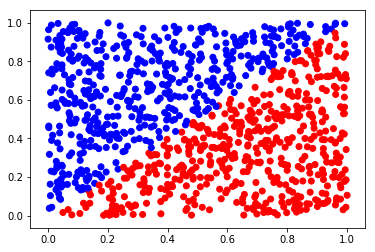

In [6]:
# Creating test data to see
x_test_array=np.random.rand(1000,input_dimension)

x_test=Variable(torch.from_numpy(x_test_array).type(torch.FloatTensor))
y_pred=net(x_test)
y_pred_array=y_pred.data.numpy()
col=['r' if i<0 else 'b' for i in y_pred_array]
plt.scatter(x_test_array[:,0],x_test_array[:,1],c=col)